# Example of polarization line fitting

In this example we demonstrate the fitting of an inter-dot transition line (also known as polarization line). This fitting is useful for determining the tunnel coupling between two quantum dots. More theoretical background about this can be found in [L. DiCarlo et al., Phys. Rev. Lett. 92, 226801 (2004)].

Sjaak van diepen - sjaak.vandiepen@tno.nl

#### Import the modules used in this example.

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import qcodes
from qcodes.data.hdf5_format import HDF5Format
import qtt
from qtt.algorithms.tunneling import fit_pol_all, polmod_all_2slopes

#### Define some physical constants.

The effective electron temperature is the temperature of the electrons in the quantum dots. A method to determine this is to do the polarization line fitting at very low tunnel coupling and then fit relative to the temperature.

In [2]:
h = 4.14 # 4.14 ueV/GHz, Planck's constant
kb = 8.6 # ueV/K, Boltzmann constant
kT = 75e-3*kb # effective electron temperature in ueV

#### Load example data.

Here we load in an example dataset. The array delta contains the difference in chemical potential between the two dots. The values for this array are in units of ueV. The fitting is not linear in the values of delta, hence to do the fitting it is the easiest to convert the voltages on the gates to energies using the leverarm. One possible method to determine the leverarm uses photon-assisted-tunneling (PAT). The array signal contains the data for the sensor signal, usually measured using reflectometry on a sensing dot. The units for this array are arbitrary.

In [3]:
exampledatadir=os.path.join(qtt.__path__[0], 'exampledata')
qcodes.DataSet.default_io = qcodes.DiskIO(exampledatadir)

dataset = qcodes.load_data('2017-02-21/15-59-56', formatter=HDF5Format())
delta = dataset.delta.ndarray
signal = dataset.signal.ndarray

#### Fit.

In [4]:
par_fit, _ = fit_pol_all(delta, signal, kT)

#### Plot the fit and the data.

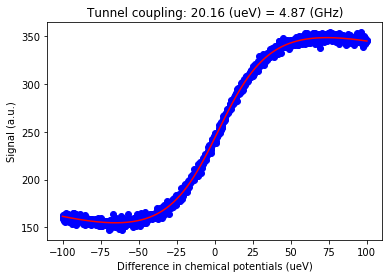

In [5]:
plt.plot(delta, signal, 'bo')
plt.plot(delta, polmod_all_2slopes(delta, par_fit, kT), 'r')
plt.title('Tunnel coupling: %.2f (ueV) = %.2f (GHz)' % (par_fit[0], par_fit[0]/h))
plt.xlabel('Difference in chemical potentials (ueV)')
_ = plt.ylabel('Signal (a.u.)')